# Compare Result Equity 

## Import Library

In [1]:
import sys
sys.path.append('../../')

In [2]:
import datetime as dt
from dateutil.relativedelta import relativedelta
import os
import pandas as pd
# import pandas_datareader as pdr
import numpy as np
import quantstats as qs
from config.constants import *
from util.plot_equity import plot_equity_trades
import matplotlib.pyplot as plt
from util.load_data import load_data

## Load result strategy

In [3]:
strategy = {}

In [42]:
initial_equity = 10000

### Data XAUUSD

In [4]:
XAUUSD = load_data()

### Buy and Hold

In [7]:
benchmark = {}

In [8]:
benchmark['D1'] = pd.read_csv(
    '../../out/Technical_Strategy/Buy_and_Hold/Backtest/result_D1.csv', index_col='Time', parse_dates=True)
benchmark['H4'] = pd.read_csv(
    '../../out/Technical_Strategy/Buy_and_Hold/Backtest/result_H4.csv', index_col='Time', parse_dates=True)
benchmark['H1'] = pd.read_csv(
    '../../out/Technical_Strategy/Buy_and_Hold/Backtest/result_H1.csv', index_col='Time', parse_dates=True)
benchmark['M30'] = pd.read_csv(
    '../../out/Technical_Strategy/Buy_and_Hold/Backtest/result_M30.csv', index_col='Time', parse_dates=True)

In [9]:
strategy['Buy and Hold'] = benchmark

###  EURUSD

In [43]:
EURUSD = {}
file = 'EURUSD'
folder = 'Kalman Filter'
Main_folder = 'Pairs_Trading'
Sub_folder = 'Backtest'

In [44]:
EURUSD['D1'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/{file}_D1.csv', index_col='Time', parse_dates=True)
EURUSD['H4'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/{file}_H4.csv', index_col='Time', parse_dates=True)
EURUSD['H1'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/{file}_H1.csv', index_col='Time', parse_dates=True)
EURUSD['M30'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/{file}_M30.csv', index_col='Time', parse_dates=True)

In [45]:
EURUSD['D1']['Equity'] = initial_equity + EURUSD['D1']['strategy'].cumsum()
EURUSD['H4']['Equity'] = initial_equity + EURUSD['H4']['strategy'].cumsum()
EURUSD['H1']['Equity'] = initial_equity + EURUSD['H1']['strategy'].cumsum()
EURUSD['M30']['Equity'] = initial_equity + EURUSD['M30']['strategy'].cumsum()

In [46]:
strategy['XAUUSD_EURUSD'] = EURUSD

###  AUDUSD

In [47]:
AUDUSD = {}
file = 'AUDUSD'
folder = 'Kalman Filter'
Main_folder = 'Pairs_Trading'
Sub_folder = 'Backtest'

In [48]:
AUDUSD['D1'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/{file}_D1.csv', index_col='Time', parse_dates=True)
AUDUSD['H4'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/{file}_H4.csv', index_col='Time', parse_dates=True)
AUDUSD['H1'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/{file}_H1.csv', index_col='Time', parse_dates=True)
AUDUSD['M30'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/{file}_M30.csv', index_col='Time', parse_dates=True)

### Reindex

In [49]:
AUDUSD['D1'] = AUDUSD['D1'].reindex(EURUSD['D1'].index, method='ffill')  # fill forward
AUDUSD['H4'] = AUDUSD['H4'].reindex(EURUSD['H4'].index, method='ffill')  # fill forward
AUDUSD['H1'] = AUDUSD['H1'].reindex(EURUSD['H1'].index, method='ffill')  # fill forward
AUDUSD['M30'] = AUDUSD['M30'].reindex(EURUSD['M30'].index, method='ffill')  # fill forward

In [50]:
AUDUSD['D1']['Equity'] = initial_equity + AUDUSD['D1']['strategy'].cumsum()
AUDUSD['H4']['Equity'] = initial_equity + AUDUSD['H4']['strategy'].cumsum()
AUDUSD['H1']['Equity'] = initial_equity + AUDUSD['H1']['strategy'].cumsum()
AUDUSD['M30']['Equity'] = initial_equity + AUDUSD['M30']['strategy'].cumsum()

In [51]:
strategy['XAUUSD_AUDUSD'] = AUDUSD

## Shown Result

### TF D1

In [52]:
TF = 'D1'

skip


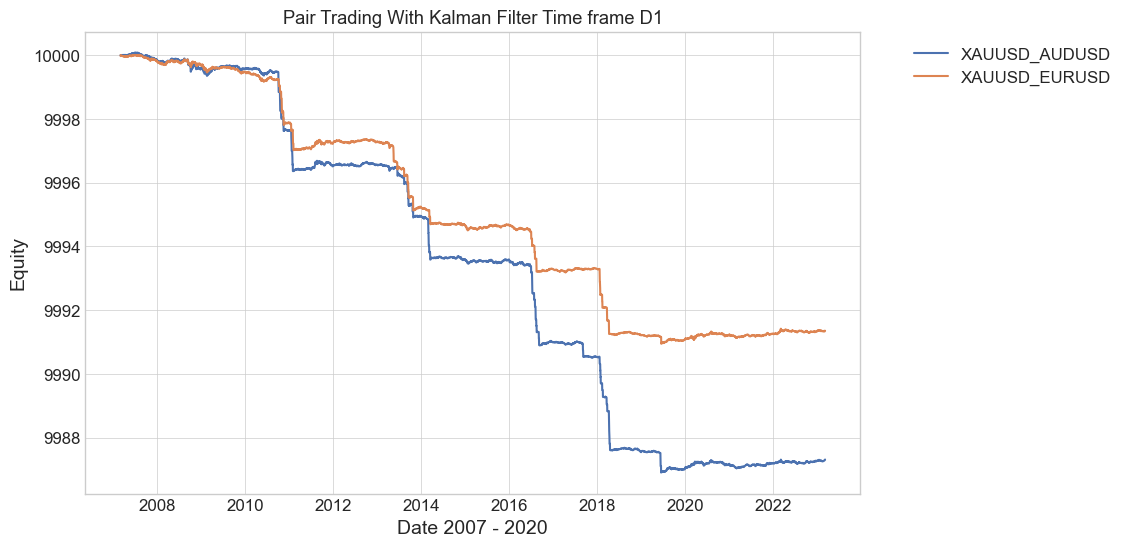

In [53]:
XAUUSD[TF] = XAUUSD[TF].reindex(
    AUDUSD['D1'].index, method='ffill')  # fill forward
x = XAUUSD[TF].index  # Using the index directly without calling it


with plt.style.context('seaborn-v0_8-whitegrid'):

    for i, data in enumerate(strategy):

        y = strategy[f'{data}'][TF]['Equity']
   

        if data == 'Buy and Hold':
            print('skip')
            # plt.plot(x, y, label=f'{data}',color='black', linewidth=3, zorder=20)

        else:

            plt.plot(x, y, label=f'{data}')

    # Number of accent colors in the color scheme

    plt.title(f'Pair Trading With Kalman Filter Time frame {TF}')

    plt.xlabel('Date 2007 - 2020', fontsize=14)

    plt.ylabel('Equity', fontsize=14)

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()